<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jihidalgor/blob/main/ActividadSemana5_DataAnalysisWithPython_A01794221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TC4029 - Ciencia y analítica de datos.**

**Semana 5 - Data Analysis with Python (IBM).**

**Módulo 2.**


Alumno: Jorge Iván Hidalgo Reyes.

*Matrícula: A01794221.*


Profesor: Jobish Vallikavungal Devassia.

Fecha: Octubre 17, 2022.

# Módulo 2: Data Wrangling.

"Data wrangling" es el proceso de convertir los datos del formato inicial a un formato que pueda ser mejor para el análisis.


# Pre-processing Data in Python.

* El preprocesamiento de datos es un paso necesario en el análisis de datos.
* El preprocesamiento de datos también se denomina a menudo como "limpieza de datos" o "manipulación de datos".
* Una condición de "missing value" ocurre siempre que una entrada de datos se encuentra vacía.
* Algunos métodos en Pandas pueden estandarizar los valores en el mismo formato (unidad o convención).
* La normalización es una manera de llevar todos los datos a un rango similar, para una comparación más útil.
* Binning crea categorías más grandes a partir de un conjunto de valores numéricos. Es particularmente útil para la comparación entre grupos de datos.

# Dealing with missing values in Python.

Cuando no se almacena ningún valor de los datos de una característica para una determinada observación, decimos que esta característica tiene un "valor perdido". Normalmente, el valor que falta en el conjunto de datos aparece como "?", "N/A", 0 o simplemente una celda en blanco.

**¿Cómo manejar los datos faltantes?**

* Revisar con la fuente que originó la colección de datos.
* Eliminar los datos faltantes: ya sea elimiando la variable o eliminando la entrada de datos.
* Remplazar los datos faltantes: reemplazando con el promedio, reemplazando con la moda o reemplazando con base en otras funciones.
* Dejarlo como dato faltante.

**¿Cómo eliminar datos faltantes en Python?**

* Para eliminar los datos que contienen valores perdidos, la biblioteca Pandas tiene un método incorporado llamado 'dropna'.
* Con el método dropna se puede elegir eliminar filas o columnas que contengan valores faltantes (NaN). Para ello, se tendrá que especificar "axis=0" para eliminar las filas, o "axis=1" para eliminar las columnas que contienen los valores perdidos.





In [ ]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

df = pd.read_csv(url, header=None)

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Si el argumento "inplace = true", la modificación se realiza en el conjunto de datos directamente.

In [ ]:
df.dropna(subset=['price'], axis=0, inplace=True)

Para reemplazar los valores que faltan, como los NaN, por valores reales, la biblioteca pandas tiene un método incorporado llamado 'replace', que se puede utilizar para rellenar los valores que faltan con los nuevos valores calculados.

In [ ]:
mean = df['normalized-losses'].mean()
df['normalized-losses'].replace(np.nan, mean)

# Data formatting in Python.
* Los datos suelen ser recogidos de diferentes lugares, por diferentes personas, que pueden ser almacenados en diferentes formatos.
* Formatear los datos significa llevarlos a un estándar común de expresión que permita que permita a los usuarios hacer comparaciones significativas.
* Como parte de la limpieza de los conjuntos de datos, el formateo de los datos garantiza que éstos sean coherentes y fácilmente comprensible.
* Existen muchos tipos de datos en Pandas: los "objects" pueden ser letras o palabras, "int64" son enteros y "float" son números reales.
* Para identificar los tipos de datos, en Python se puede utilizar el método "dataframe.dtypes".
* En el caso de tipos de datos erróneos, se puede emplear el método "dataframe.astype" para convertir un tipo de dato a otro.


In [ ]:
df['city-mpg'] = 235/df['city-mpg']
df.rename(columns = {'city-mpg':'city-L/100km'}, inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,10.217391,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,12.368421,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,13.055556,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,9.038462,27,22470


# Data normalization in Python.

Hay varias formas de normalizar los datos:

* El primer método, llamado "Simple Feature Scaling", simplemente divide cada valor por el valor máximo de esa característica. Esto hace que los nuevos valores oscilen entre 0 y 1.

>> $x_{new} = \frac{x_{old}}{x_{max}}$

* El segundo método, llamado "Min-Max", toma cada valor, X_old, restado del valor mínimo de esa característica, y luego lo divide por el rango de esa característica. De nuevo, los nuevos valores resultantes oscilan entre 0 y 1.

>> $x_{new} = \frac{x_{old} - x_{min}}{x_{max} - x_{min}}$

* El tercer método se denomina "Z-score" o "Standard score". En esta fórmula, a cada valor se le resta la μ que es la media de la característica, y luego se divide por la desviación estándar (σ). Los valores resultantes rondan el 0, y suelen oscilar entre -3 y +3, pero pueden ser mayores o inferior.

>> $x_{new} = \frac{x_{old} - μ}{σ}$




In [ ]:
df['length'] = df['length']/df['length'].max()
#df['length'] = (df['length'] - df['length'].min()) / (df['length'].max() - df['length'].min())
#df['length'] = (df['length'] - df['length'].mean()) / df['length'].std()

# Binnig in Python.

Binning es el proceso de agrupar valores en grupos con la misma anchura, a los que se le suelen denominar bins.

Este proceso puede mejorar la precisión de los modelos de predicción.

En Python es muy sencillo implementar este proceso. Primero utilizamos la función de Numpy "linspace" que regresa un array con los bins. Posteriormente, creamos una lista que contiene los diferentes nombres para cada bin. Luego, utilizamos la función "cut" para segmentar y ordenar los datos en los bins.

Finalmente, se puede generar un histograma para visualizar la distribución de los datos posterior a su agrupación en los diferentes bins.

In [ ]:
#bins = np.linspace(min(df['price']), max(df['price']), 4)
#group_names = ['Low', 'Medium', 'High']
#df['price-binned'] = pd.cut(df['price'], bins, labels = group_names, include_lowest=True)

# Turning categorical variables into quantitative variables un Python.

La mayoría de los modelos estadísticos no pueden tomar objetos o "strings" como entrada y, para el entrenamiento del modelo sólo toman los números como entradas.

Una solución para convertir variables categóricas en numéricas es la siguiente:

* Crea una variable "dummy" para cada categoría única.
* Asigna 0 o 1 en cada categoría.
* En Pandas, se puede utilizar la función get_dummies() para convertir variables categóricas en variables dummy.
* La función get_dummies() genera automáticamente una lista de números, cada uno correspondiente a una categoría particular de la variable. 


# LAB 2 Review Data Wrangling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [ ]:
async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [ ]:
df = pd.read_csv(filename, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Los valores que faltan se convierten por defecto. 

Utilizamos las siguientes funciones para identificar estos valores perdidos. Existen dos métodos para detectar los datos que faltan:

* isnull()
* notnull()

La salida es un valor booleano que indica si el valor que se pasa en el argumento es en realidad un dato que falta.

In [ ]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

**Calcula el valor promedio de la columna "normalized-losses".**

In [ ]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


**Reemplaza "NaN" con el valor medio en la columna "normalized-losses".**

In [ ]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

**Calcula el valor medio para la columna "bore".**

In [ ]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


**Reemplaza "NaN" con el valor medio en la columna "bore".**

In [ ]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [ ]:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

df["stroke"].replace(np.nan, avg_stroke, inplace = True)

Average of stroke: 3.255422885572139


In [ ]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Average horsepower: 104.25615763546799


In [ ]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average peak rpm: 5125.369458128079


In [ ]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [ ]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [ ]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Formato correcto de los datos.**

El último paso en la limpieza de datos es revisar y estar seguro que todos los datos se encuentran en el formato correcto (int, float, text u otro).

En Pandas, se utiliza:

* .dtype()
* .astype()

In [ ]:
df.dtypes 

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**Convierte los tipos de datos al formato correcto.**

In [ ]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
df['city-L/100km'] = 235/df["city-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


**¿Por qué normalizar?**

La normalización es el proceso de transformar los valores de varias variables en un rango similar. Las normalizaciones típicas incluyen el escalado de la variable para que la media de la variable sea 0, el escalado de la variable para que la varianza sea 1, o el escalado de la variable para que los valores de la variable oscilen entre 0 y 1.

In [ ]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [ ]:
df['height'] = df['height']/df['height'].max() 
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


**Binning.**

¿Por qué es necesario el proceso de binning?

El binning es un proceso de transformación de las variables numéricas continuas en "bins" categóricos discretos para el análisis agrupado.

In [ ]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

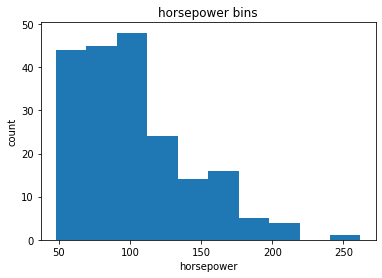

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [ ]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
group_names = ['Low', 'Medium', 'High']

In [ ]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [ ]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

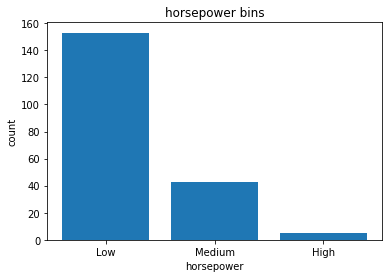

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

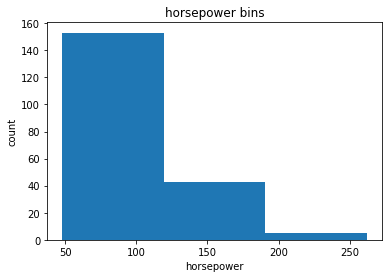

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

**Variable Dummy.**

¿Qué es una variable indicadora?

Una variable indicadora (o variable ficticia) es una variable numérica utilizada para etiquetar categorías. Se denominan "ficticias" porque los números en sí no tienen un significado inherente.

¿Por qué utilizamos variables indicadoras?

Utilizamos variables indicadoras para poder utilizar variables categóricas para el análisis de regresión en los módulos posteriores.

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [ ]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("fuel-type", axis = 1, inplace=True)

In [ ]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


In [ ]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop('aspiration', axis = 1, inplace=True)

In [ ]:
df.to_csv('clean_df.csv')

# Graded Review Questions.

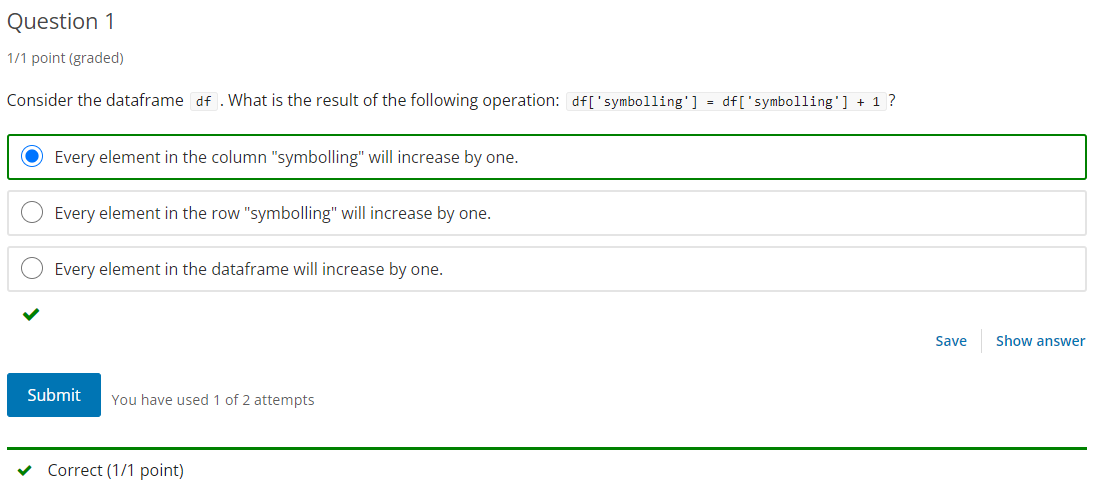

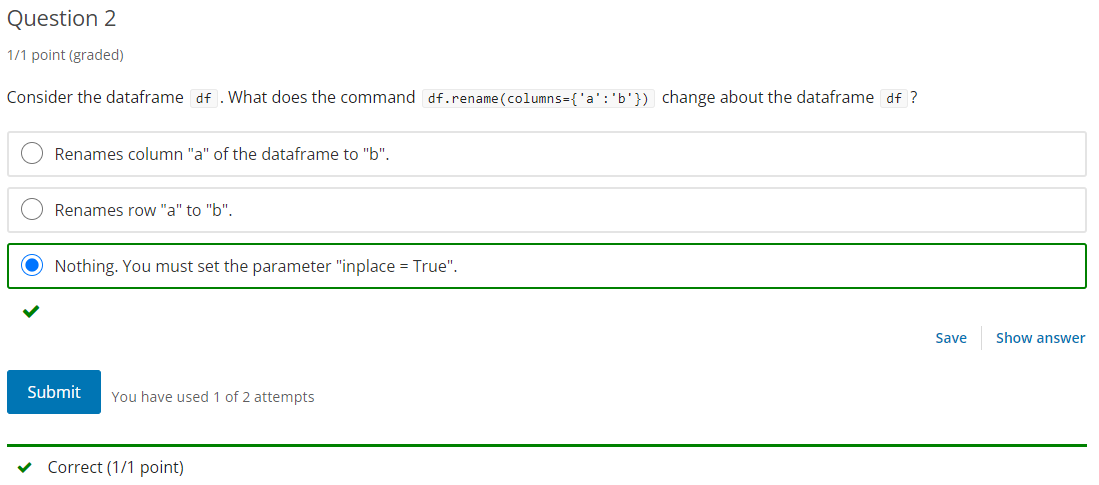

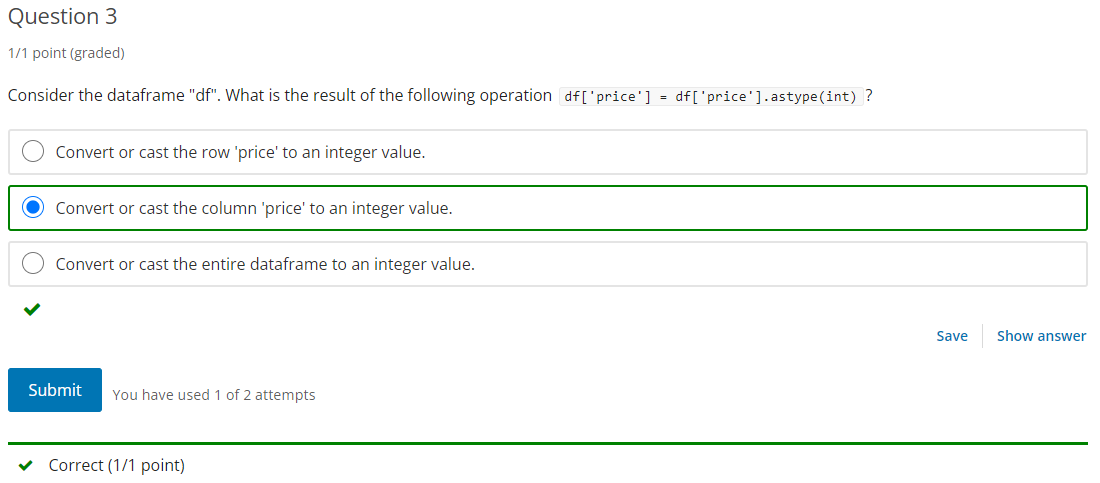

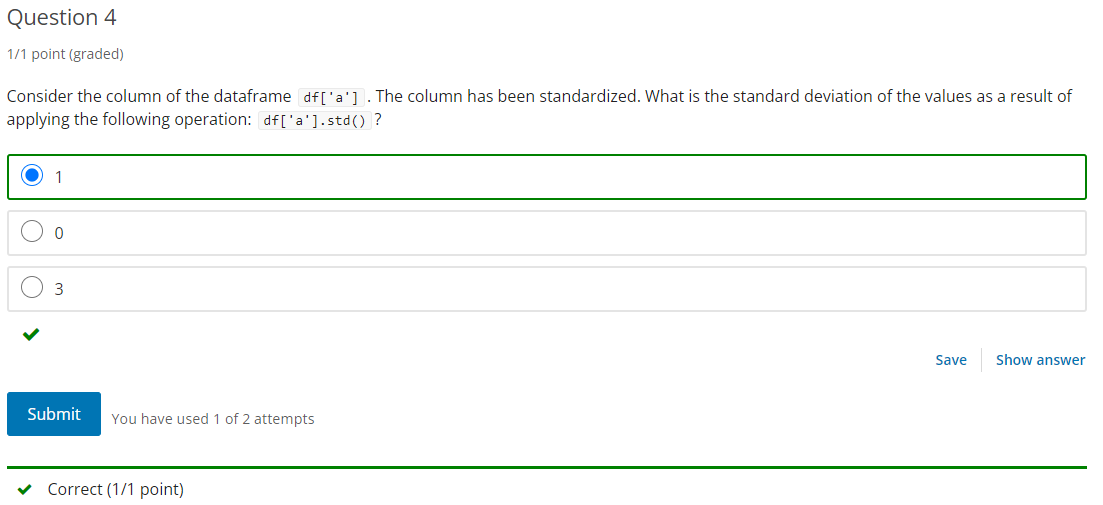

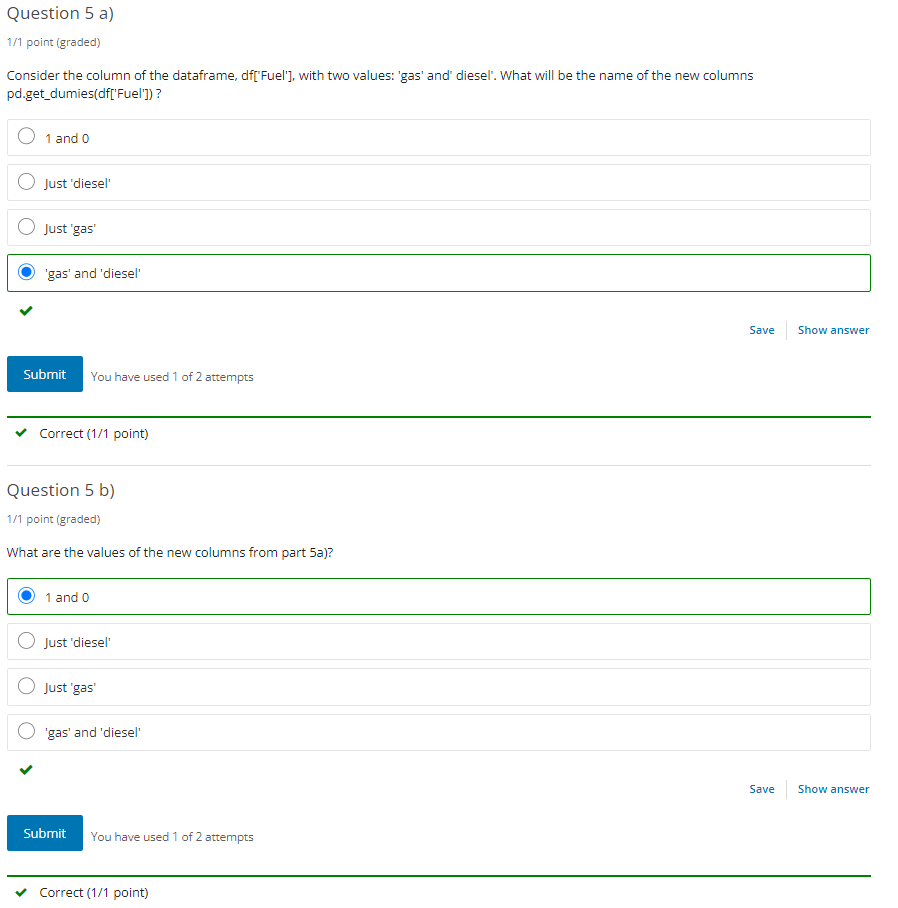

# Course Progress.

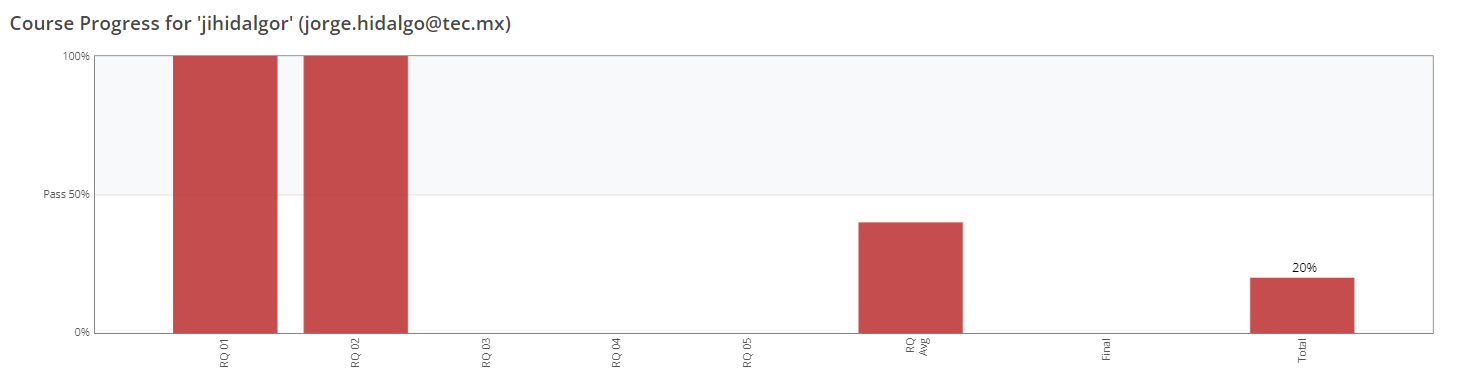